# Compare BedMachine v2 and v3 to assess whether it's worth going for v3

Noting GEBCO2024 contains BedMachine v2 (https://www.gebco.net/data_and_products/gridded_bathymetry_data/gebco_2024/ says "data based on MEaSUREs BedMachine Antarctica, Version 2 (Morlighem, M. et al 2020).")

BedMachine v3 is downloaded here: `/g/data/x77/cy8964/satellite-meltrate/Adusumilli/BedMachineAntarctica-v3.nc`

- Bedmachine, Morlighem et al. (2020) data: https://nsidc.org/data/nsidc-0756/versions/3  paper: https://www.nature.com/articles/s41561-019-0510-8

- version 2 is here: https://nsidc.org/data/nsidc-0756/versions/2 ; https://n5eil01u.ecs.nsidc.org/MEASURES/NSIDC-0756.002/1970.01.01/, `/g/data/x77/cy8964/satellite-meltrate/Adusumilli/BedMachineAntarctica_2020-07-15_v02.nc`

Spatial Resolution:
500 m x 
500 m

Spatial Reference System(s):
WGS 84 / Antarctic Polar StereographicEPSG:3031

Spatial Coverage:
N:-53 S:-90 E:180 W:-180

https://nsidc.org/data/nsidc-0756/versions/3 says 
```
Changes for Version 3 include:
• Added ice thickness measurements from CReSIS 2018, CReSIS 2019, and PASIN
• Updated thinning rates per Smith et al. (2020)
• Added parameter (“dataid”) to more easily identify data source
• Uses IBCSO v2 for ocean bathymetry
```

In [1]:
# import some useful packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from dask.distributed import Client
import cartopy.crs as ccrs
import cmocean.cm as cmo
import matplotlib.path as mpath


In [2]:
client = Client()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36675 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/36675/status,
Dashboard: /proxy/36675/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38051,Workers: 7
Dashboard: /proxy/36675/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:40509,Total threads: 2
Dashboard: /proxy/36545/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:46217,


In [3]:
BedMachine = xr.open_dataset('/g/data/x77/cy8964/satellite-meltrate/Adusumilli/BedMachineAntarctica-v3.nc')
BedMachine

<xarray.Dataset> Size: 4GB
Dimensions:    (x: 13333, y: 13333)
Coordinates:
  * x          (x) int32 53kB -3333000 -3332500 -3332000 ... 3332500 3333000
  * y          (y) int32 53kB 3333000 3332500 3332000 ... -3332500 -3333000
Data variables:
    mapping    |S1 1B ...
    mask       (y, x) int8 178MB ...
    firn       (y, x) float32 711MB ...
    surface    (y, x) float32 711MB ...
    thickness  (y, x) float32 711MB ...
    bed        (y, x) float32 711MB ...
    errbed     (y, x) float32 711MB ...
    source     (y, x) int8 178MB ...
    dataid     (y, x) int8 178MB ...
    geoid      (y, x) int16 356MB ...
Attributes: (12/17)
    Conventions:                 CF-1.7
    Title:                       BedMachine Antarctica
    Author:                      Mathieu Morlighem
    version:                     03-Jun-2022 (v3.4)
    nx:                          13333.0
    ny:                          13333.0
    ...                          ...
    ymax:                        3333000
    spacing:                     500
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2019), Deep glacial tr...
    Notes:                       Data processed at the Department of Earth Sy...

In [4]:
BedMachinev2 = xr.open_dataset('/g/data/x77/cy8964/satellite-meltrate/Adusumilli/BedMachineAntarctica_2020-07-15_v02.nc')
BedMachinev2

<xarray.Dataset> Size: 4GB
Dimensions:    (x: 13333, y: 13333)
Coordinates:
  * x          (x) int32 53kB -3333000 -3332500 -3332000 ... 3332500 3333000
  * y          (y) int32 53kB 3333000 3332500 3332000 ... -3332500 -3333000
Data variables:
    mapping    |S1 1B ...
    mask       (y, x) int8 178MB ...
    firn       (y, x) float32 711MB ...
    surface    (y, x) float32 711MB ...
    thickness  (y, x) float32 711MB ...
    bed        (y, x) float32 711MB ...
    errbed     (y, x) float32 711MB ...
    source     (y, x) int8 178MB ...
    geoid      (y, x) int16 356MB ...
Attributes: (12/17)
    Conventions:                 CF-1.7
    Title:                       BedMachine Antarctica
    Author:                      Mathieu Morlighem
    version:                     15-Jul-2020 (v2.0)
    nx:                          13333.0
    ny:                          13333.0
    ...                          ...
    ymax:                        3333000
    spacing:                     500
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2019), Deep glacial tr...
    Notes:                       Data processed at the Department of Earth Sy...

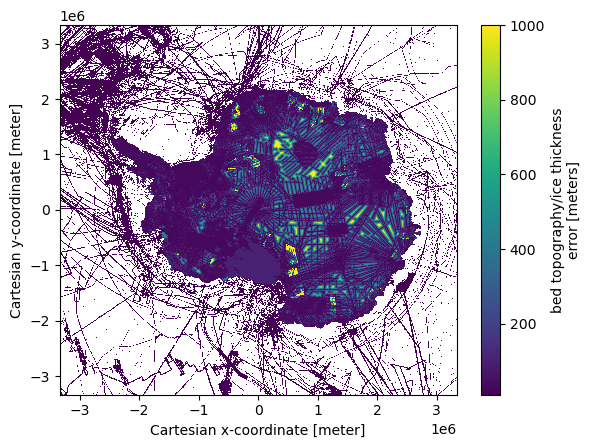

In [6]:
BedMachine.errbed.plot()

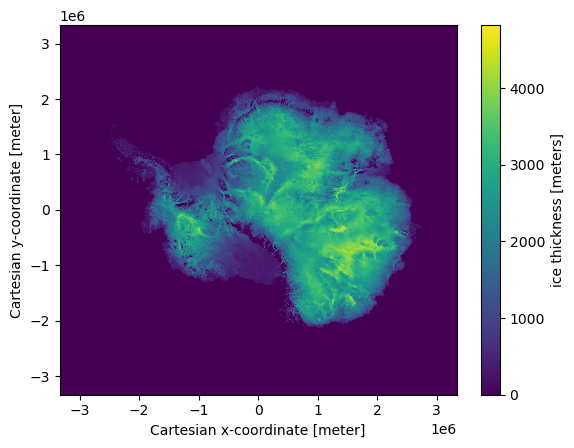

In [8]:
BedMachine.thickness.plot()

Text(0.5, 1.0, 'V3 - V2 thickness')

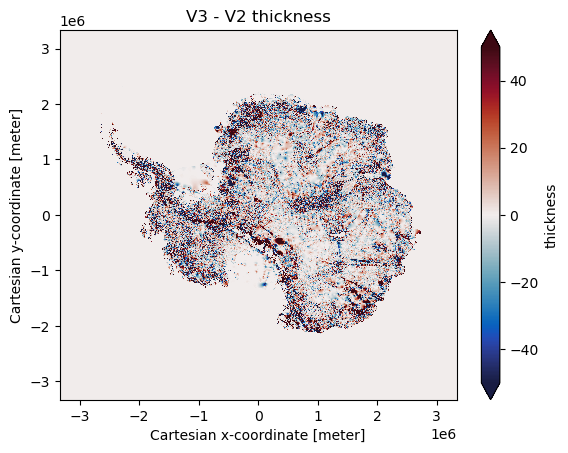

In [5]:
(BedMachine.thickness-BedMachinev2.thickness).plot(vmax = 50, vmin = -50, cmap = cmo.balance)
plt.title('V3 - V2 thickness')

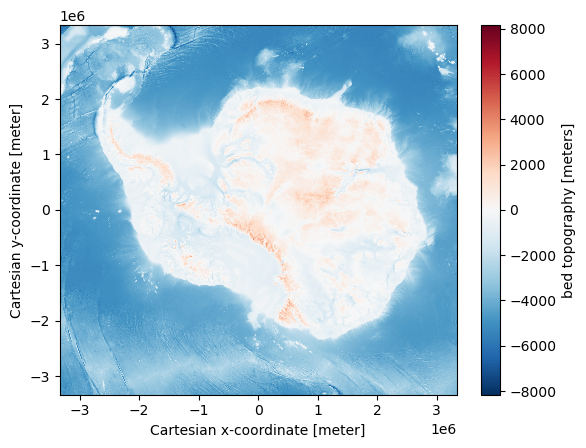

In [10]:
BedMachine.bed.plot()

Text(0.5, 1.0, 'V3 - V2 bed')

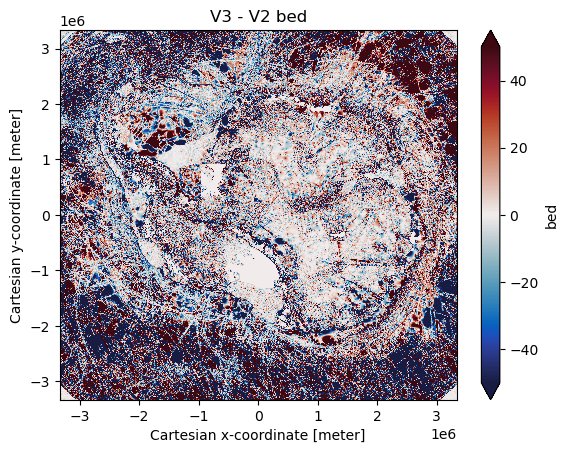

In [6]:
(BedMachine.bed-BedMachinev2.bed).plot(vmax = 50, vmin = -50, cmap = cmo.balance)
plt.title('V3 - V2 bed')